In [1]:
path = "../results/gsm8k/llama/CAPO/seed44/benchmark_experiment_gsm8k_llama_CAPO_44/fkjd/step_results_eval.csv"

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

In [3]:
df = pd.read_csv(glob(path, recursive=True)[0])
df

,step,timestamp,time_elapsed,score,prompt,input_tokens_meta_llm,output_tokens_meta_llm,input_tokens_downstream_llm,output_tokens_downstream_llm,test_score
0,1,2025-03-21 20:02:00.797319,2371.859177,0.808333,I'd appreciate your assistance with this eleme...,1344,493,1867624,584105,0.714
1,1,2025-03-21 20:02:00.797319,2371.859177,0.795833,I'm having trouble with this grade school math...,1344,493,1867624,584105,0.742
2,1,2025-03-21 20:02:00.797319,2371.859177,0.762500,Calling all math wizards! I need help with thi...,1344,493,1867624,584105,0.722
3,1,2025-03-21 20:02:00.797319,2371.859177,0.750000,I'm struggling with a complex math word proble...,1344,493,1867624,584105,0.692
4,1,2025-03-21 20:02:00.797319,2371.859177,0.741667,Please solve this math story problem. Show eac...,1344,493,1867624,584105,0.720
...,...,...,...,...,...,...,...,...,...,...
105,11,2025-03-21 21:16:03.090275,492.184471,0.756667,Calling all math wizards! I need help with thi...,1666,748,378054,102994,0.722
106,11,2025-03-21 21:16:03.090275,492.184471,0.733333,Break down and resolve the provided math word ...,1666,748,378054,102994,0.692
107,11,2025-03-21 21:16:03.090275,492.184471,0.733333,I'm struggling to solve a complex math word pr...,1666,748,378054,102994,0.674
108,11,2025-03-21 21:16:03.090275,492.184471,0.733333,Please solve this math story problem. Show eac...,1666,748,378054,102994,0.720


In [4]:
df["total_tokens"] = (
    df["output_tokens_meta_llm"]
    + df["input_tokens_meta_llm"]
    + df["output_tokens_downstream_llm"]
    + df["input_tokens_downstream_llm"]
)
df["total_tokens"] = df["total_tokens"].cumsum()

In [5]:
# cum of tokens
df["output_tokens_downstream_llm_cum"] = df["output_tokens_downstream_llm"].cumsum()
df["output_tokens_meta_llm_cum"] = df["output_tokens_meta_llm"].cumsum()
df["input_tokens_downstream_llm_cum"] = df["input_tokens_downstream_llm"].cumsum()
df["input_tokens_meta_llm_cum"] = df["input_tokens_meta_llm"].cumsum()

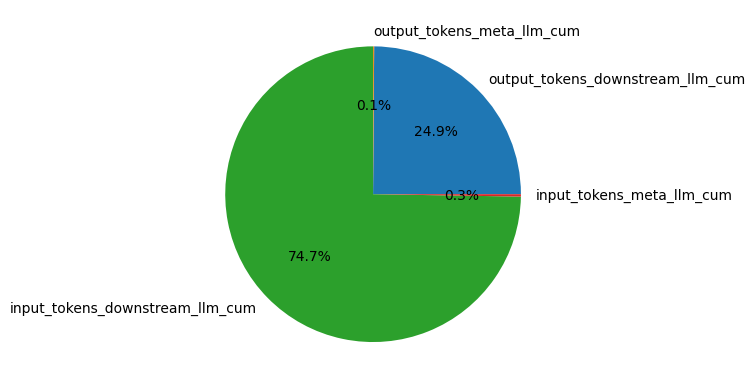

In [6]:
# plot pie
fig, ax = plt.subplots()
ax.pie(
    [
        df["output_tokens_downstream_llm_cum"].iloc[-1],
        df["output_tokens_meta_llm_cum"].iloc[-1],
        df["input_tokens_downstream_llm_cum"].iloc[-1],
        df["input_tokens_meta_llm_cum"].iloc[-1],
    ],
    labels=[
        "output_tokens_downstream_llm_cum",
        "output_tokens_meta_llm_cum",
        "input_tokens_downstream_llm_cum",
        "input_tokens_meta_llm_cum",
    ],
    autopct="%1.1f%%",
)
plt.show()

In [7]:
df["n_shots"] = df["prompt"].str.count("Input:") - 1

In [8]:
print(df["prompt"].sample(1).item())

I'd appreciate your assistance with this elementary math word problem. Please explain each step of your reasoning and make sure to format the final solution inside <final_answer> </final_answer> markers.

Input:
Mark wants to build a pyramid of soda cases that's four levels tall. Each level of the pyramid has a square base where each side is one case longer than the level above it. The top level is just one case. How many cases of soda does Mark need?
Output:
To solve this problem, we need to calculate the number of cases in each level of the pyramid and then add them up.

The top level has 1 case, since it's just one case.

The second level has a square base with 2 cases on each side, so it has 2 * 2 = 4 cases.

The third level has a square base with 3 cases on each side, so it has 3 * 3 = 9 cases.

The fourth level has a square base with 4 cases on each side, so it has 4 * 4 = 16 cases.

Now, we add up the number of cases in each level: 1 + 4 + 9 + 16 = 30.

So, Mark needs <final_ans

In [9]:
df["prompt_len"] = df["prompt"].str.len()

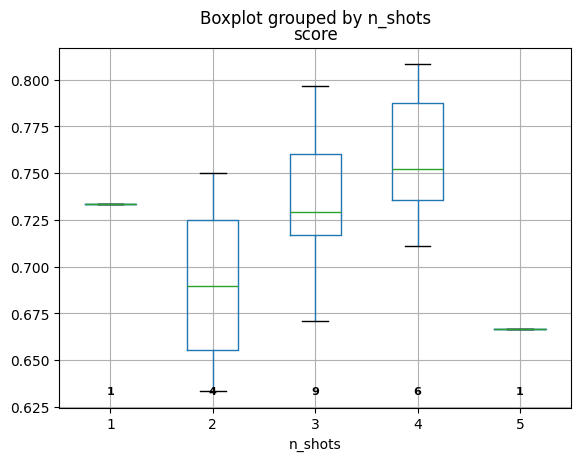

In [10]:
# correlation between number shots and score => boxplot, and give number of samples per n_shots
fig = df.groupby("prompt").first().boxplot(column="score", by="n_shots", showfliers=False)
# add number of samples (unique prompts!) per n_shots
num_samples = df.groupby(["prompt", "n_shots"]).size().reset_index().groupby("n_shots").size()
for i, n in enumerate(num_samples):
    fig.text(
        i + 1,
        df["score"].min(),
        n,
        ha="center",
        va="center",
        rotation=0,
        fontsize=8,
        color="black",
        fontweight="bold",
    )

plt.show();

In [11]:
# group df by step and get the mean of the values (ignore stings)
df_grouped = df.groupby("step", as_index=False).mean(numeric_only=True)
# df_grouped["cum_input_tokens"] = df_grouped["input_tokens_downstream_llm"].cumsum()

# join the maximum score for each step
df_grouped = df_grouped.join(
    df.groupby("step", as_index=False).max()[["step", "score"]].set_index("step"),
    on="step",
    rsuffix="_max",
)

df_grouped

,step,time_elapsed,score,input_tokens_meta_llm,output_tokens_meta_llm,input_tokens_downstream_llm,output_tokens_downstream_llm,test_score,total_tokens,output_tokens_downstream_llm_cum,output_tokens_meta_llm_cum,input_tokens_downstream_llm_cum,input_tokens_meta_llm_cum,n_shots,prompt_len,score_max
0,1,2371.859177,0.722083,1344.0,493.0,1867624.0,584105.0,0.6596,13494613.0,3212577.5,2711.5,10271932.0,7392.0,3.3,2390.2,0.808333
1,2,186.479014,0.727500,1459.0,586.0,125979.0,40184.0,0.6656,25460804.0,6062062.0,8153.0,19369124.5,21464.5,3.4,2428.3,0.808333
2,3,120.390653,0.727500,1513.0,643.0,79234.0,27889.0,0.6656,26818774.5,6396279.5,14326.5,20371817.0,36351.5,3.4,2428.3,0.808333
3,4,224.328697,0.729167,1590.0,695.0,133787.0,60138.0,0.6738,28389685.0,6852539.0,21042.5,21464198.5,51905.0,3.1,2179.1,0.808333
4,5,620.333161,0.746845,1631.0,764.0,455272.0,165771.0,0.6938,32701539.0,8034900.5,28372.0,24570236.0,68030.5,3.0,2237.7,0.808333
5,6,640.032959,0.745926,1630.0,790.0,465124.0,164974.0,0.6970,38985859.0,9688227.0,36155.0,29177142.0,84335.0,3.1,2154.6,0.811111
6,7,542.144447,0.737667,1794.0,814.0,360743.0,151828.0,0.6970,44665674.5,11265664.0,44187.0,33254286.5,101537.0,3.1,2154.6,0.810000
7,8,607.906919,0.742000,1563.0,618.0,433117.0,137628.0,0.6972,50135073.0,12705844.0,51249.0,37259773.5,118206.5,3.3,2252.8,0.810000
8,9,372.453011,0.748000,1665.0,796.0,272898.0,81306.0,0.7000,54674897.5,13772353.0,58408.0,40709739.0,134397.5,3.2,2334.3,0.810000
9,10,636.025037,0.755000,1602.0,668.0,457056.0,157195.0,0.7108,59670755.5,15002802.5,65664.0,44451588.0,150701.0,3.2,2251.9,0.810000


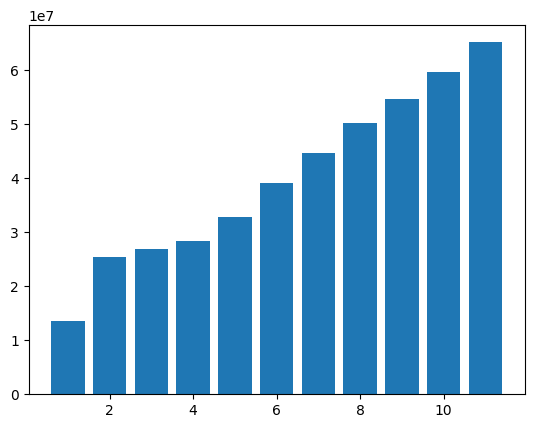

In [12]:
# plot step vs total tokens
plt.bar(df_grouped["step"], df_grouped["total_tokens"]);

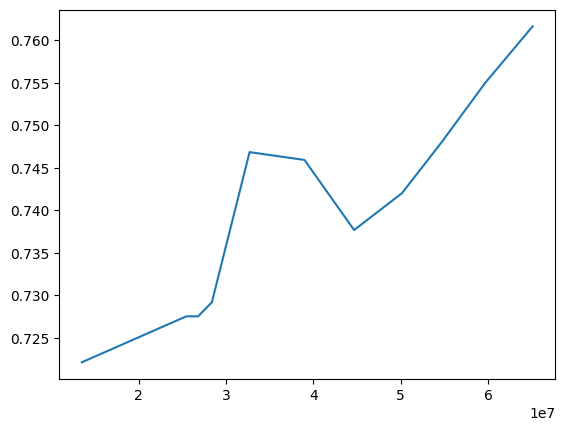

In [13]:
# plot token count vs step and adapt y-axis to min and max
column = "score"
plt.plot(df_grouped["total_tokens"], df_grouped[column])
plt.show();

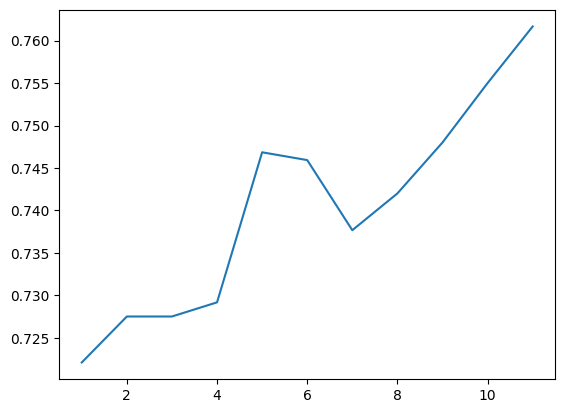

In [14]:
# plot token count vs step and adapt y-axis to min and max
column = "score"
plt.plot(df_grouped["step"], df_grouped[column])
plt.show();

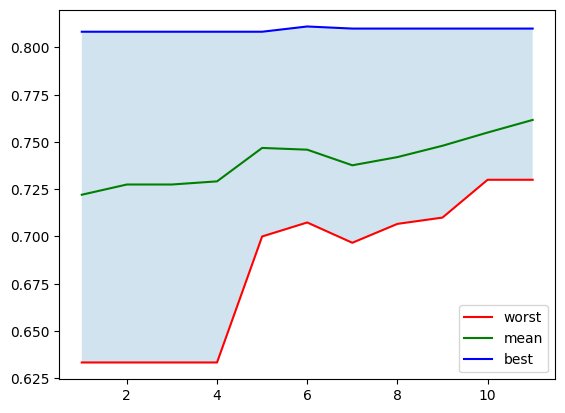

In [15]:
# x_axis => step, y_axis => worst_score, mean_score, best_score
col = "score"

worst_scores = df.groupby("step", as_index=False).min(numeric_only=True)[["step", col]]
mean_scores = df.groupby("step", as_index=False).mean(numeric_only=True)[["step", col]]
best_scores = df.groupby("step", as_index=False).max(numeric_only=True)[["step", col]]

plt.plot(worst_scores["step"], worst_scores[col], label="worst", color="red")
plt.plot(mean_scores["step"], mean_scores[col], label="mean", color="green")
plt.plot(best_scores["step"], best_scores[col], label="best", color="blue")
# fill area between lines
plt.fill_between(mean_scores["step"], worst_scores[col], best_scores[col], alpha=0.2)
plt.legend()
plt.show();

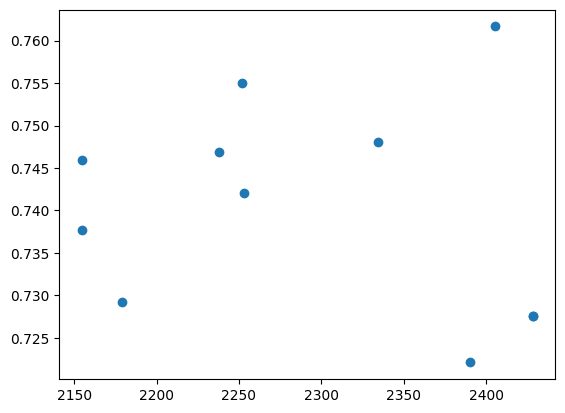

In [16]:
# plot score vs prompt length
plt.scatter(df_grouped["prompt_len"], df_grouped["score"])
plt.show();

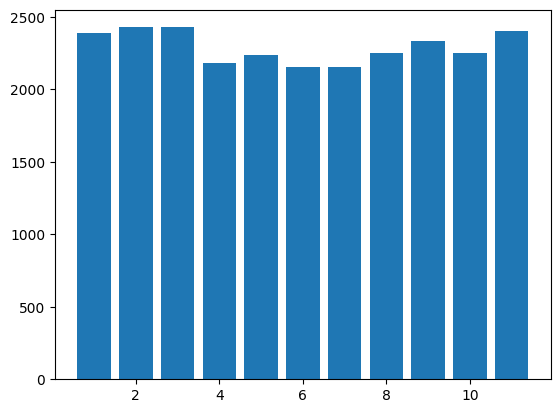

In [17]:
# prompt length vs step
plt.bar(df_grouped["step"], df_grouped["prompt_len"]);

### Analyze best prompts per step

In [18]:
df_best = df.groupby("step").apply(lambda x: x.nlargest(1, "score")).reset_index(drop=True)
# df_best

C:\Users\tzehl\AppData\Local\Temp\ipykernel_6668\373190983.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_best = df.groupby("step").apply(lambda x: x.nlargest(1, "score")).reset_index(drop=True)


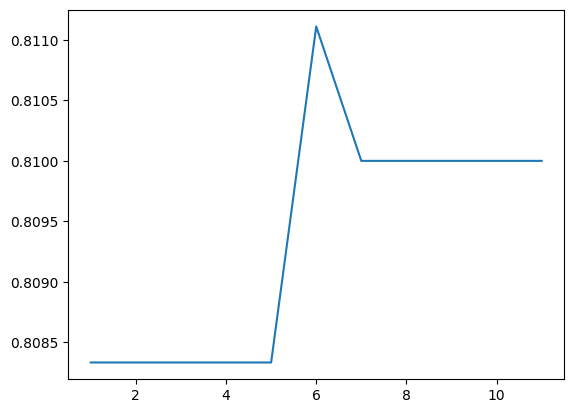

In [19]:
# max a line plot of the best score vs step
plt.plot(df_best["step"], df_best["score"]);

## Analyze Racing

In [20]:
from pprint import pprint as pp

p = lambda x: (pp(x.replace("\r", ""), compact=True, width=200))

In [21]:
df["score"].nlargest(10)

50     0.811111
60     0.810000
70     0.810000
80     0.810000
90     0.810000
100    0.810000
0      0.808333
10     0.808333
20     0.808333
30     0.808333
Name: score, dtype: float64

In [22]:
# best prompt
col = "score"
k_best = 20

best_prompt = df[df[col] == df[col].nlargest(k_best).values[k_best - 1]]
print("unique?", len(best_prompt["prompt"].unique()))
print("number of shots: ", best_prompt["n_shots"].values[0])
print("score: ", best_prompt[col].values[0])
print("first occurence: ", best_prompt["step"].values[0])
print("last occurence: ", best_prompt["step"].values[-1])
print("last train score: ", best_prompt["score"].values[-1].round(2))

p(best_prompt["prompt"].unique()[0])

unique? 1
number of shots:  4
score:  0.7958333333333333
first occurence:  1
last occurence:  5
last train score:  0.8
("I'm having trouble with this grade school math word problem. Can you provide a detailed solution? Make sure to put your final answer between <final_answer> and </final_answer> markers so I can "
 'easily identify it.\n'
 '\n'
 'Input:\n'
 'Marcy uses 6 ounces of pet cleaner to clean up a dog stain, 4 ounces to clean up a cat stain, and 1 ounce to clean up a rabbit stain. How much cleaner does she need to clean up after 6 dogs, 3 '
 'cats and 1 rabbit?\n'
 'Output:\n'
 '<final_answer>49</final_answer>\n'
 '\n'
 'Input:\n'
 'Billy ate 20 apples this week. On Monday, he ate 2 apples. On Tuesday, he ate twice as many as he ate the day before. He’s not sure what he ate on Wednesday. On Thursday, he ate four times as many '
 'as he ate on Friday. On Friday, he ate half of the amount he ate on Monday.  How many apples did he eat on Wednesday?\n'
 'Output:\n'
 '<final_answer

In [23]:
print(best_prompt["prompt"].unique()[0])

I'm having trouble with this grade school math word problem. Can you provide a detailed solution? Make sure to put your final answer between <final_answer> and </final_answer> markers so I can easily identify it.

Input:
Marcy uses 6 ounces of pet cleaner to clean up a dog stain, 4 ounces to clean up a cat stain, and 1 ounce to clean up a rabbit stain. How much cleaner does she need to clean up after 6 dogs, 3 cats and 1 rabbit?
Output:
<final_answer>49</final_answer>

Input:
Billy ate 20 apples this week. On Monday, he ate 2 apples. On Tuesday, he ate twice as many as he ate the day before. He’s not sure what he ate on Wednesday. On Thursday, he ate four times as many as he ate on Friday. On Friday, he ate half of the amount he ate on Monday.  How many apples did he eat on Wednesday?
Output:
<final_answer>9</final_answer>

Input:
Phill had some friends over for pizza.  He opens the pizza box and discovers it hasn't been sliced.  Phill cuts the pizza in half, and then cuts both halves 

In [24]:
best_prompt["prompt"].unique()[0]

"I'm having trouble with this grade school math word problem. Can you provide a detailed solution? Make sure to put your final answer between <final_answer> and </final_answer> markers so I can easily identify it.\r\n\r\nInput:\r\nMarcy uses 6 ounces of pet cleaner to clean up a dog stain, 4 ounces to clean up a cat stain, and 1 ounce to clean up a rabbit stain. How much cleaner does she need to clean up after 6 dogs, 3 cats and 1 rabbit?\r\nOutput:\r\n<final_answer>49</final_answer>\r\n\r\nInput:\r\nBilly ate 20 apples this week. On Monday, he ate 2 apples. On Tuesday, he ate twice as many as he ate the day before. He’s not sure what he ate on Wednesday. On Thursday, he ate four times as many as he ate on Friday. On Friday, he ate half of the amount he ate on Monday.  How many apples did he eat on Wednesday?\r\nOutput:\r\n<final_answer>9</final_answer>\r\n\r\nInput:\r\nPhill had some friends over for pizza.  He opens the pizza box and discovers it hasn't been sliced.  Phill cuts the p

In [35]:
s = df.prompt.sample(1).item()
s

"Please solve this math story problem. Show each step of your thought process. Be sure to include your final answer between <final_answer> and </final_answer> markers.\r\n\r\nInput:\r\nDiana gets 30 minutes of video game time for every hour she reads. Her dad decided to raise her reward by 20%. Diana read for 12 hours this week. How many more minutes of video game time will she get as a result of her raise?\r\nOutput:\r\n<final_answer>72</final_answer>\r\n\r\nInput:\r\nCalvin is a bug collector.  In his collection, he has 12 giant roaches, 3 scorpions, half as many crickets as roaches, and twice as many caterpillars as scorpions.  How many insects does Calvin have in his collection?\r\nOutput:\r\nTo solve this problem, we need to calculate the total number of insects in Calvin's collection. Let's break it down step by step:\r\n\r\n1. Calvin has 12 giant roaches.\r\n2. He has 3 scorpions.\r\n3. He has half as many crickets as roaches. Since he has 12 roaches, he has 12 / 2 = 6 crickets.

In [38]:
print("\r")

In [39]:
# get number of blocks per prompt by counting non nans per columns
n_blocks = df_blocks.count(axis=1) - 1

In [40]:
n_blocks

Analyze and solve the following elementary school math problem that requires multiple steps of reasoning. Your final answer must be contained within <final_answer> </final_answer> tags.\n\nInput:\nAlice wants 1000 folded paper cranes. She folds half by herself, and a friend folds a fifth of the remaining paper cranes for her. How many paper cranes does Alice still need to fold?\nOutput:\nTo solve this problem, we need to break it down into steps.\n\nFirst, Alice wants 1000 folded paper cranes and she folds half by herself. Half of 1000 is 1000 / 2 = 500. So, Alice folds 500 paper cranes.\n\nNow, there are 1000 - 500 = 500 paper cranes left to be folded.\n\nA friend folds a fifth of the remaining paper cranes for her. A fifth of 500 is 500 / 5 = 100. So, the friend folds 100 paper cranes.\n\nNow, we need to find out how many paper cranes are still left to be folded. We started with 500 remaining after Alice folded her half, and the friend folded 100 of those. So, 500 - 100 = 400 paper c

In [41]:
df_count = pd.DataFrame({"n_blocks": n_blocks.values, "prompt": df_blocks["Unnamed: 0"]})

KeyError: 'Unnamed: 0'

In [ ]:
df_count["n_blocks"].value_counts()

n_blocks
1     199
10     32
2      20
4       7
5       4
3       4
6       1
8       1
Name: count, dtype: int64

In [ ]:
# join with df
df_count = df_count.join(df.set_index("prompt"), on="prompt", how="left", lsuffix="_rrr")

# bin by test_score
df_count["test_score_bin"] = pd.cut(df_count["test_score"], bins=5)

ValueError: Bin edges must be unique: Index([nan, nan, nan, nan, nan, nan], dtype='float64').
You can drop duplicate edges by setting the 'duplicates' kwarg

In [ ]:
# evals vs score => boxplot
df_count.boxplot(column="n_blocks", by="test_score_bin");

KeyError: 'test_score_bin'

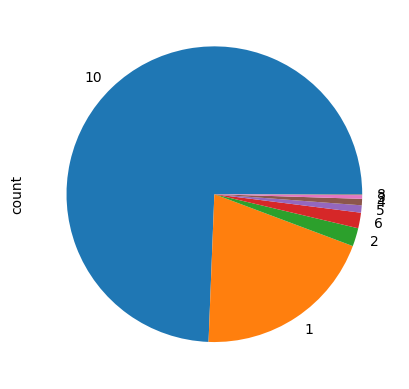

In [ ]:
# pie chart of number of blocks per prompt
df_count["n_blocks"].value_counts().plot.pie();

In [ ]:
# clculate the number of saved evaluations, so how many differ by how much from 10 in n_blocks
df_count["n_blocks_diff"] = abs(df_count["n_blocks"] - 10)
n_blocks_diff_times_n = (
    df_count["n_blocks_diff"].value_counts() * df_count["n_blocks_diff"].value_counts().index
)
n_blocks_diff_times_n.sum()

2131

In [ ]:
# total number of evaluations
df_count["n_blocks"].sum()

7859

In [ ]:
# tokens saved
(n_blocks_diff_times_n.sum()) / (n_blocks_diff_times_n.sum() + df_count["n_blocks"].sum())

0.21331331331331332

In [ ]:
df_count["n_blocks"].describe()

count    999.000000
mean       7.866867
std        3.715495
min        1.000000
25%        6.000000
50%       10.000000
75%       10.000000
max       10.000000
Name: n_blocks, dtype: float64